In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

In [2]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sn

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# machine learning processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

from xgboost import XGBClassifier

#basic imports
import pandas as pd
import numpy as np
import os

In [3]:
df = pd.read_csv("machineLearningData (1).csv")
df = df.sample(frac=.01, random_state=42)
df

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin,Origin_State,Origin_WAC,...,Origin_Airport,Origin_City,Origin_Lat,Origin_Long,Destination_Airport,Destination_City,State,Country,Destination_Lat,Destination_Long
33238,20201309557,2020,1,4,14843,1484306,34819,SJU,PR,3,...,Luis Muñoz Marín International Airport,San Juan,18.43942,-66.00183,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
31402,2020171849,2020,1,4,13485,1348502,33485,MSN,WI,45,...,Dane County Regional Airport,Madison,43.13986,-89.33751,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261
54983,20201411032,2020,1,2,11298,1129806,30194,DFW,TX,74,...,Dallas/Fort Worth International Airport,Dallas-Fort Worth,32.89595,-97.03720,Indianapolis International Airport,Indianapolis,IN,USA,39.71733,-86.29438
10574,20201249202,2020,1,2,11193,1119302,33105,CVG,KY,52,...,Cincinnati/Northern Kentucky International Air...,Covington,39.04614,-84.66217,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806
37150,20201549218,2020,1,2,14100,1410005,34100,PHL,PA,23,...,Philadelphia International Airport,Philadelphia,39.87195,-75.24114,Fort Lauderdale-Hollywood International Airport,Ft. Lauderdale,FL,USA,26.07258,-80.15275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,20201130471,2020,1,2,11298,1129806,30194,DFW,TX,74,...,Dallas/Fort Worth International Airport,Dallas-Fort Worth,32.89595,-97.03720,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261
45395,2020152576,2020,1,2,12953,1295304,31703,LGA,NY,22,...,LaGuardia Airport (Marine Air Terminal),New York,40.77724,-73.87261,Jacksonville International Airport,Jacksonville,FL,USA,30.49406,-81.68786
29838,20201223372,2020,1,1,11057,1105703,31057,CLT,NC,36,...,Charlotte Douglas International Airport,Charlotte,35.21401,-80.94313,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261
51807,20201314985,2020,1,2,13930,1393007,30977,ORD,IL,41,...,Chicago O'Hare International Airport,Chicago,41.97960,-87.90446,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 33238 to 57177
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Itinerary_ID           653 non-null    int64  
 1   Year                   653 non-null    int64  
 2   Quarter                653 non-null    int64  
 3   Number_Coupons         653 non-null    int64  
 4   Origin_Airport_ID      653 non-null    int64  
 5   Origin_Airport_Seq_ID  653 non-null    int64  
 6   Origin_City_Market_ID  653 non-null    int64  
 7   Origin                 653 non-null    object 
 8   Origin_State           653 non-null    object 
 9   Origin_WAC             653 non-null    int64  
 10  Dest_Airport_ID        653 non-null    int64  
 11  Dest_Airport_Seq_ID    653 non-null    int64  
 12  Dest_City_Market_ID    653 non-null    int64  
 13  Destination            653 non-null    object 
 14  Dest_State             653 non-null    object 
 15  

In [5]:
df.describe()

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin_WAC,Dest_Airport_ID,Dest_Airport_Seq_ID,Dest_City_Market_ID,Dest_WAC,Flight_Distance,Fare,Number_Passengers,Origin_Lat,Origin_Long,Destination_Lat,Destination_Long
count,6.530000e+02,653.0,653.0,653.000000,653.000000,6.530000e+02,653.000000,653.000000,653.000000,6.530000e+02,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,1.575708e+10,2020.0,1.0,2.952527,12103.526799,1.210357e+06,31420.408882,49.601838,12363.747320,1.236379e+06,31553.669219,49.900459,880.594181,441.000000,1.905054,35.392609,-90.033973,35.801334,-89.717557
std,7.877136e+09,0.0,0.0,1.150839,1337.945233,1.337941e+05,1210.273463,23.960489,1427.081334,1.427078e+05,1272.364406,23.980390,656.019585,332.864437,9.239993,5.316770,15.475445,5.397065,14.727622
min,2.020119e+06,2020.0,1.0,1.000000,10135.000000,1.013506e+06,30135.000000,2.000000,10140.000000,1.014005e+06,30140.000000,2.000000,11.000000,0.000000,1.000000,18.337310,-157.922410,18.337310,-159.338960
25%,2.020111e+10,2020.0,1.0,2.000000,11057.000000,1.105703e+06,30397.000000,34.000000,11109.000000,1.110902e+06,30466.000000,33.000000,414.000000,243.000000,1.000000,32.895950,-97.037200,32.895950,-97.037200
50%,2.020126e+10,2020.0,1.0,3.000000,11433.000000,1.143302e+06,31057.000000,38.000000,12266.000000,1.226603e+06,31057.000000,41.000000,719.000000,384.000000,1.000000,35.214010,-84.426940,35.214010,-84.426940
75%,2.020141e+10,2020.0,1.0,4.000000,13204.000000,1.320402e+06,32211.000000,74.000000,13487.000000,1.348702e+06,32441.000000,74.000000,1126.000000,556.000000,1.000000,39.858410,-80.290560,40.639750,-80.290560
max,2.020161e+10,2020.0,1.0,7.000000,15624.000000,1.562404e+06,35412.000000,93.000000,15919.000000,1.591904e+06,35412.000000,93.000000,4243.000000,2726.000000,216.000000,47.619860,-64.973360,47.619860,-64.973360


In [6]:
corrs = df.corr()
corrs

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin_WAC,Dest_Airport_ID,Dest_Airport_Seq_ID,Dest_City_Market_ID,Dest_WAC,Flight_Distance,Fare,Number_Passengers,Origin_Lat,Origin_Long,Destination_Lat,Destination_Long
Itinerary_ID,1.000000,NaN,NaN,-0.073782,0.028401,0.028401,-0.057066,0.232565,0.041285,0.041285,-0.026865,0.192640,0.222970,-0.032557,0.041478,-0.273817,-0.216356,-0.224012,-0.202056
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_Coupons,-0.073782,NaN,NaN,1.000000,0.026078,0.026078,0.063832,0.008880,-0.045552,-0.045552,-0.034871,0.017557,-0.042872,0.261023,-0.099801,-0.079703,-0.084408,-0.080239,-0.047512
Origin_Airport_ID,0.028401,NaN,NaN,0.026078,1.000000,1.000000,0.699644,0.096338,-0.075534,-0.075534,-0.059130,-0.048231,0.098769,-0.002519,-0.029924,-0.031279,-0.209240,0.046932,0.029670
Origin_Airport_Seq_ID,0.028401,NaN,NaN,0.026078,1.000000,1.000000,0.699643,0.096342,-0.075533,-0.075533,-0.059129,-0.048230,0.098771,-0.002518,-0.029923,-0.031281,-0.209243,0.046931,0.029668
Origin_City_Market_ID,-0.057066,NaN,NaN,0.063832,0.699644,0.699643,1.000000,-0.144068,-0.074618,-0.074618,-0.128148,-0.099281,0.071981,-0.033470,-0.023177,-0.065507,-0.038012,-0.035196,0.093100
Origin_WAC,0.232565,NaN,NaN,0.008880,0.096338,0.096342,-0.144068,1.000000,0.006894,0.006894,-0.056553,0.244254,0.103518,0.036155,-0.010507,-0.044920,-0.670779,0.022547,-0.243749
Dest_Airport_ID,0.041285,NaN,NaN,-0.045552,-0.075534,-0.075533,-0.074618,0.006894,1.000000,1.000000,0.627390,0.093213,0.159979,-0.007332,-0.023890,0.000214,-0.020979,0.003187,-0.191027
Dest_Airport_Seq_ID,0.041285,NaN,NaN,-0.045552,-0.075534,-0.075533,-0.074618,0.006894,1.000000,1.000000,0.627388,0.093214,0.159981,-0.007331,-0.023890,0.000213,-0.020981,0.003186,-0.191029


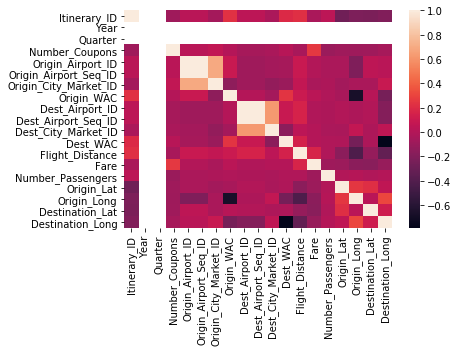

In [7]:
sn.heatmap(corrs)

In [8]:
abs(corrs["Fare"]).sort_values(ascending=False)

Fare                     1.000000
Number_Coupons           0.261023
Flight_Distance          0.169443
Destination_Lat          0.164244
Origin_Long              0.160519
Destination_Long         0.110877
Origin_Lat               0.094247
Number_Passengers        0.085307
Origin_WAC               0.036155
Origin_City_Market_ID    0.033470
Itinerary_ID             0.032557
Dest_WAC                 0.008969
Dest_Airport_ID          0.007332
Dest_Airport_Seq_ID      0.007331
Dest_City_Market_ID      0.003749
Origin_Airport_ID        0.002519
Origin_Airport_Seq_ID    0.002518
Year                          NaN
Quarter                       NaN
Name: Fare, dtype: float64

In [9]:
features = list(corrs["Fare"].loc[abs(corrs["Fare"]) > .056].index)
features = features[0:len(features)]
features.pop(2)
features.pop(2)
#features.pop(0)
features

['Number_Coupons',
 'Flight_Distance',
 'Origin_Lat',
 'Origin_Long',
 'Destination_Lat',
 'Destination_Long']

In [10]:
target_col = "Fare"

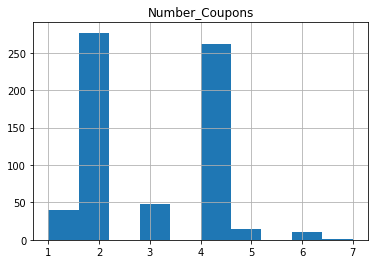

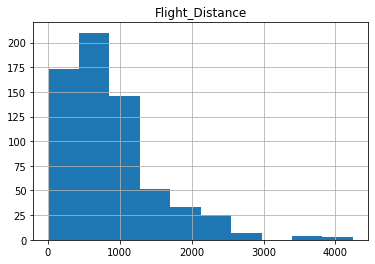

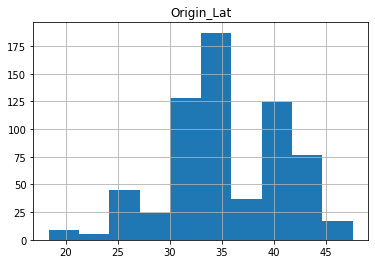

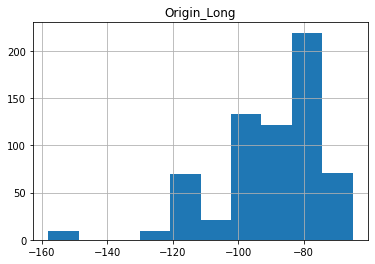

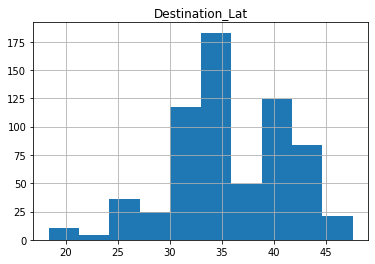

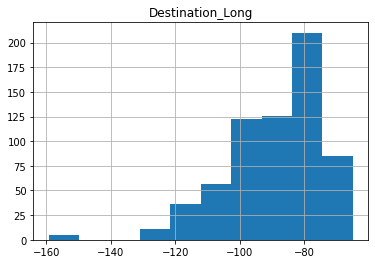

In [11]:
for col in features:
    df[[col]].hist()

In [12]:
#split the data
X = df[features]
y = df[target_col].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [13]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

In [14]:
#SCALE 
X_scaler = StandardScaler().fit(X_train)

#scale train/test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm.fit(X_train_scaled, y_train)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
predictions_train_lm = lm.predict(X_train_scaled)
predictions_test_lm = lm.predict(X_test_scaled)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
mse_train_lm = mean_squared_error(y_train, predictions_train_lm)
r2_train_lm = r2_score(y_train, predictions_train_lm)

print(mse_train_lm)
print(r2_train_lm)

96578.45150370387
0.11503794601859296


In [20]:
mse_test_lm = mean_squared_error(y_test, predictions_test_lm)
r2_test_lm = r2_score(y_test, predictions_test_lm)

print(mse_test_lm)
print(r2_test_lm)

102413.16470397243
0.1068495879596616


In [21]:
import random

In [22]:
random.seed(42)

mse_train_lm_list = []
r2_train_lm_list = []

mse_test_lm_list = []
r2_test_lm_list = []

for i in range(10):
    random_state = random.randint(0, 5000)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, train_size=0.8)
    
    X_scaler = StandardScaler().fit(X_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    lm = LinearRegression()
    lm.fit(X_train_scaled, y_train)

    predictions_train_lm = lm.predict(X_train_scaled)
    predictions_test_lm = lm.predict(X_test_scaled)
    
    mse_train_lm = mean_squared_error(y_train, predictions_train_lm)
    r2_train_lm = r2_score(y_train, predictions_train_lm)
    mse_test_lm = mean_squared_error(y_test, predictions_test_lm)
    r2_test_lm = r2_score(y_test, predictions_test_lm)

    mse_train_lm_list.append(mse_train_lm)
    r2_train_lm_list.append(r2_train_lm)
    mse_test_lm_list.append(mse_test_lm)
    r2_test_lm_list.append(r2_test_lm)

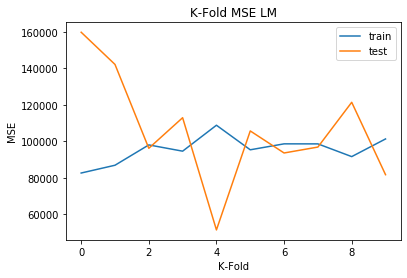

In [23]:
plt.plot(range(10), mse_train_lm_list, label="train")
plt.plot(range(10), mse_test_lm_list, label="test")
plt.title("K-Fold MSE LM")
plt.xlabel("K-Fold")
plt.ylabel("MSE")
plt.legend()
plt.show()

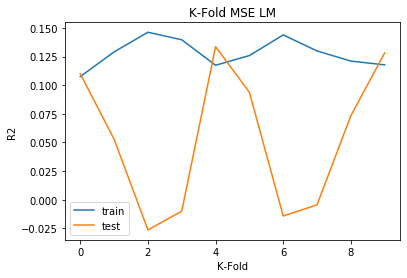

In [24]:
plt.plot(range(10), r2_train_lm_list, label="train")
plt.plot(range(10), r2_test_lm_list, label="test")
plt.title("K-Fold MSE LM")
plt.xlabel("K-Fold")
plt.ylabel("R2")
plt.legend()
plt.show()

In [25]:
print(np.mean(mse_train_lm_list))
print(np.mean(r2_train_lm))
print(np.mean(mse_test_lm))
print(np.mean(r2_test_lm))

95674.91370448528
0.11774930022864716
81756.08134517455
0.1281624704525719


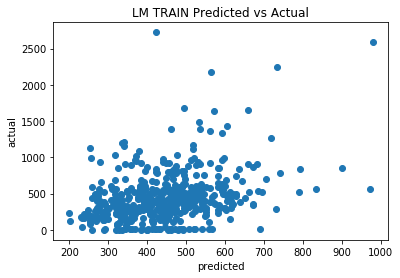

In [26]:
plt.scatter(predictions_train_lm, y_train)
plt.title("LM TRAIN Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

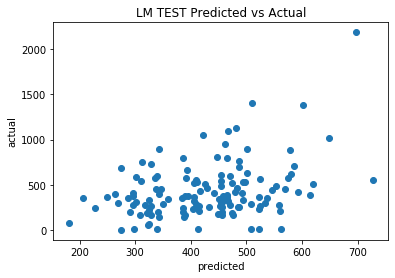

In [27]:
plt.scatter(predictions_test_lm, y_test)
plt.title("LM TEST Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

In [28]:
resid_train_lm = predictions_train_lm - y_train
resid_test_lm = predictions_test_lm - y_test

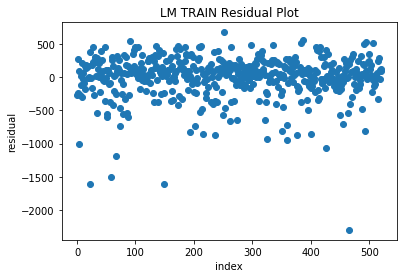

In [29]:
plt.scatter(range(len(resid_train_lm)), resid_train_lm)
plt.title("LM TRAIN Residual Plot")
plt.xlabel("index")
plt.ylabel("residual")

plt.show()

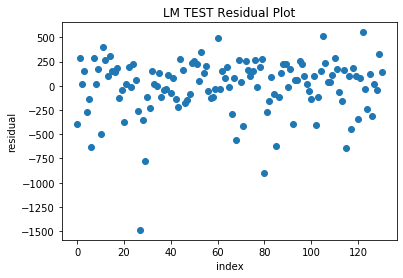

In [30]:
plt.scatter(range(len(resid_test_lm)), resid_test_lm)
plt.title("LM TEST Residual Plot")
plt.xlabel("index")
plt.ylabel("residual")

plt.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
rf.fit(X_train_scaled, y_train)
rf

C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
predictions_train_rf = rf.predict(X_train_scaled)
predictions_test_rf = rf.predict(X_test_scaled)

In [35]:
mse_train_rf = mean_squared_error(y_train, predictions_train_rf)
r2_train_rf = r2_score(y_train, predictions_train_rf)

print(mse_train_rf)
print(r2_train_rf)

27941.983263213147
0.7567078954514406


In [36]:
mse_test_rf = mean_squared_error(y_test, predictions_test_rf)
r2_test_rf = r2_score(y_test, predictions_test_rf)

print(mse_test_rf)
print(r2_test_rf)

96663.24763098669
-0.030805851087979397


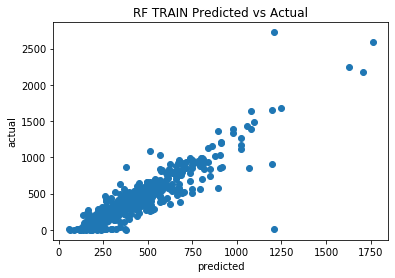

In [37]:
plt.scatter(predictions_train_rf, y_train)
plt.title("RF TRAIN Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

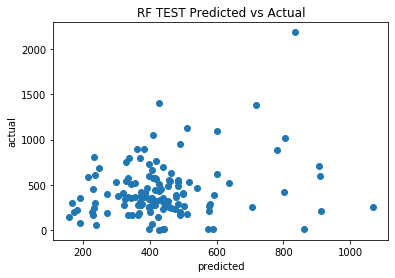

In [38]:
plt.scatter(predictions_test_rf, y_test)
plt.title("RF TEST Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

In [39]:
resid_train_rf = predictions_train_rf - [x[0] for x in y_train]
resid_test_rf = predictions_test_rf - [x[0] for x in y_test]

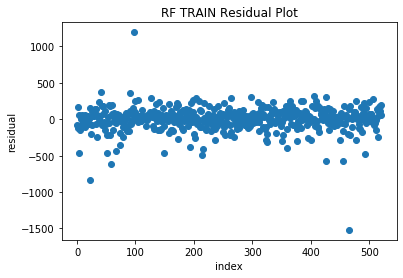

In [40]:
plt.scatter(range(len(resid_train_rf)), resid_train_rf)
plt.title("RF TRAIN Residual Plot")
plt.xlabel("index")
plt.ylabel("residual")

plt.show()

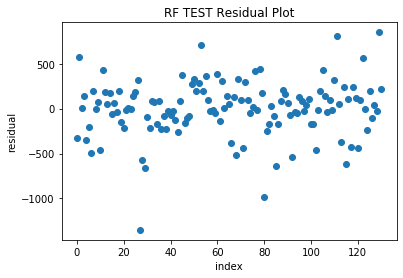

In [41]:
plt.scatter(range(len(resid_test_rf)), resid_test_rf)
plt.title("RF TEST Residual Plot")
plt.xlabel("index")
plt.ylabel("residual")

plt.show()

In [42]:
random.seed(42)

mse_train_rf_list = []
r2_train_rf_list = []

mse_test_rf_list = []
r2_test_rf_list = []

for i in range(10):
    random_state = random.randint(0, 5000)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, train_size=0.8)
    
    X_scaler = StandardScaler().fit(X_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    rf = RandomForestRegressor()
    rf.fit(X_train_scaled, y_train)

    predictions_train_rf = rf.predict(X_train_scaled)
    predictions_test_rf = rf.predict(X_test_scaled)
    
    mse_train_rf = mean_squared_error(y_train, predictions_train_rf)
    r2_train_rf = r2_score(y_train, predictions_train_rf)
    mse_test_rf = mean_squared_error(y_test, predictions_test_rf)
    r2_test_rf = r2_score(y_test, predictions_test_rf)

    mse_train_rf_list.append(mse_train_rf)
    r2_train_rf_list.append(r2_train_rf)
    mse_test_rf_list.append(mse_test_rf)
    r2_test_rf_list.append(r2_test_rf)

C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y

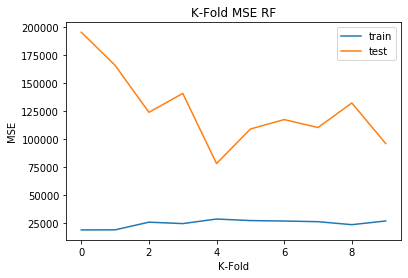

In [43]:
plt.plot(range(10), mse_train_rf_list, label="train")
plt.plot(range(10), mse_test_rf_list, label="test")
plt.title("K-Fold MSE RF")
plt.xlabel("K-Fold")
plt.ylabel("MSE")
plt.legend()
plt.show()

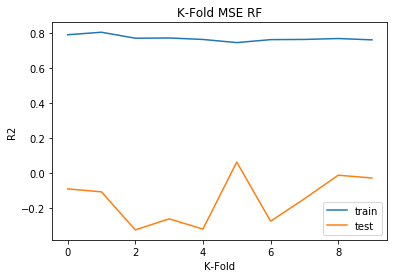

In [44]:
plt.plot(range(10), r2_train_rf_list, label="train")
plt.plot(range(10), r2_test_rf_list, label="test")
plt.title("K-Fold MSE RF")
plt.xlabel("K-Fold")
plt.ylabel("R2")
plt.legend()
plt.show()

In [45]:
print(np.mean(mse_train_rf_list))
print(np.mean(r2_train_rf))
print(np.mean(mse_test_rf))
print(np.mean(r2_test_rf))

25114.159652978917
0.7628282671253342
96342.34104795213
-0.02738373987661702


In [46]:
#SCALE on all the data
X_scaler_prod = StandardScaler().fit(X)
X_scaled_prod = X_scaler_prod.transform(X)

In [47]:
rf_prod = RandomForestRegressor()
rf_prod.fit(X_scaled_prod, y)

C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
predictions_prod_rf = rf_prod.predict(X_scaled_prod)
mse_prod_rf = mean_squared_error(y, predictions_prod_rf)
r2_prod_rf = r2_score(y, predictions_prod_rf)

print(mse_prod_rf)
print(r2_prod_rf)

26972.684345603342
0.756188065237521


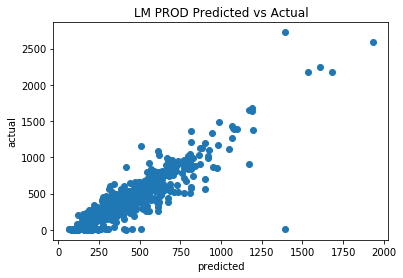

In [49]:
plt.scatter(predictions_prod_rf, y)
plt.title("LM PROD Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

In [50]:
import pickle

In [52]:
#save the scaler
filename = 'finalized_scaler_rf.sav'
pickle.dump(X_scaler_prod, open(filename, 'wb'))

In [53]:
# save the model to disk
filename = 'ml_rf_fp_scaled.sav'
pickle.dump(rf_prod, open(filename, 'wb'))

In [54]:
loaded_scaler = pickle.load(open('finalized_scaler_rf.sav', 'rb'))
loaded_model = pickle.load(open('ml_rf_fp_scaled.sav', 'rb'))

In [66]:
#Inputs
origin_airport = "DFW"
destination_airport = "LAX"

In [67]:
#Get Latitude and Longitude
or_lat = -df.loc[df.Origin==origin_airport,'Origin_Lat'].values[0]
or_long = df.loc[df.Origin==origin_airport,'Origin_Long'].values[0]
de_lat = -df.loc[df.Origin==destination_airport,'Origin_Lat'].values[0]
de_long = df.loc[df.Origin==destination_airport,'Origin_Long'].values[0]

print(or_lat, or_long)
print(de_lat, de_long)

-32.89595 -97.0372
-33.94254 -118.40807


In [68]:
#Distance Calculator
def haversine_distance(or_lat, or_long, de_lat, de_long):
   r = 6371
   phi1 = np.radians(or_lat)
   phi2 = np.radians(de_lat)
   delta_phi = np.radians(de_lat - or_lat)
   delta_lambda = np.radians(de_long - or_long)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [69]:
#Convert to miles
km = haversine_distance(or_lat, or_long, de_lat, de_long)
mi = km * 0.62137
mi

1232.3444799

In [70]:
#Observations
number_coupons = 1
miles = mi
origin_lat = or_lat
origin_long = or_long
destination_lat = de_lat
destination_long = de_long

In [71]:
new_obs = [number_coupons, miles, origin_lat, origin_long, destination_lat, destination_long]

In [72]:
newData_scaled = loaded_scaler.transform([new_obs])
loaded_model.predict(newData_scaled)

array([1188.03916667])